# Исследование объявлений о продаже квартир

###  1 Откроем файл с данными и изучим общую информацию. 

Импортируем библиотеку pandas. Считаем данные из csv-файла в датафрейм и сохраним в переменную `data`. Путь к файлу:

`/datasets/real_estate_data.csv`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('real_estate_data.csv', sep='\t')


Выведем первые 15 строчек датафрейма `data` на экран.

In [2]:
data.head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем основную информацию о датафрейме с помощью метода info().

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

С первого взгляда видно что многие столбцы имеют пропуски

В таблице 23699 строк и 22 столбца, выведем количество пропущенных значений для каждого столбца

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
percent_nulls = (data.isnull().sum()/len(data)*100).sort_values().round(1)
percent_nulls

total_images             0.0
open_plan                0.0
floor                    0.0
rooms                    0.0
studio                   0.0
total_area               0.0
last_price               0.0
first_day_exposition     0.0
locality_name            0.2
floors_total             0.4
living_area              8.0
kitchen_area             9.6
days_exposition         13.4
ponds_around3000        23.3
parks_around3000        23.3
cityCenters_nearest     23.3
airports_nearest        23.4
ceiling_height          38.8
balcony                 48.6
ponds_nearest           61.6
parks_nearest           65.9
is_apartment            88.3
dtype: float64

Пропуски в %

Выведем общую информацию

In [6]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Построим общую гистограмму для всех числовых столбцов таблицы

array([[<AxesSubplot: title={'center': 'total_images'}>,
        <AxesSubplot: title={'center': 'last_price'}>,
        <AxesSubplot: title={'center': 'total_area'}>,
        <AxesSubplot: title={'center': 'rooms'}>],
       [<AxesSubplot: title={'center': 'ceiling_height'}>,
        <AxesSubplot: title={'center': 'floors_total'}>,
        <AxesSubplot: title={'center': 'living_area'}>,
        <AxesSubplot: title={'center': 'floor'}>],
       [<AxesSubplot: title={'center': 'kitchen_area'}>,
        <AxesSubplot: title={'center': 'balcony'}>,
        <AxesSubplot: title={'center': 'airports_nearest'}>,
        <AxesSubplot: title={'center': 'cityCenters_nearest'}>],
       [<AxesSubplot: title={'center': 'parks_around3000'}>,
        <AxesSubplot: title={'center': 'parks_nearest'}>,
        <AxesSubplot: title={'center': 'ponds_around3000'}>,
        <AxesSubplot: title={'center': 'ponds_nearest'}>],
       [<AxesSubplot: title={'center': 'days_exposition'}>,
        <AxesSubplot: >, 

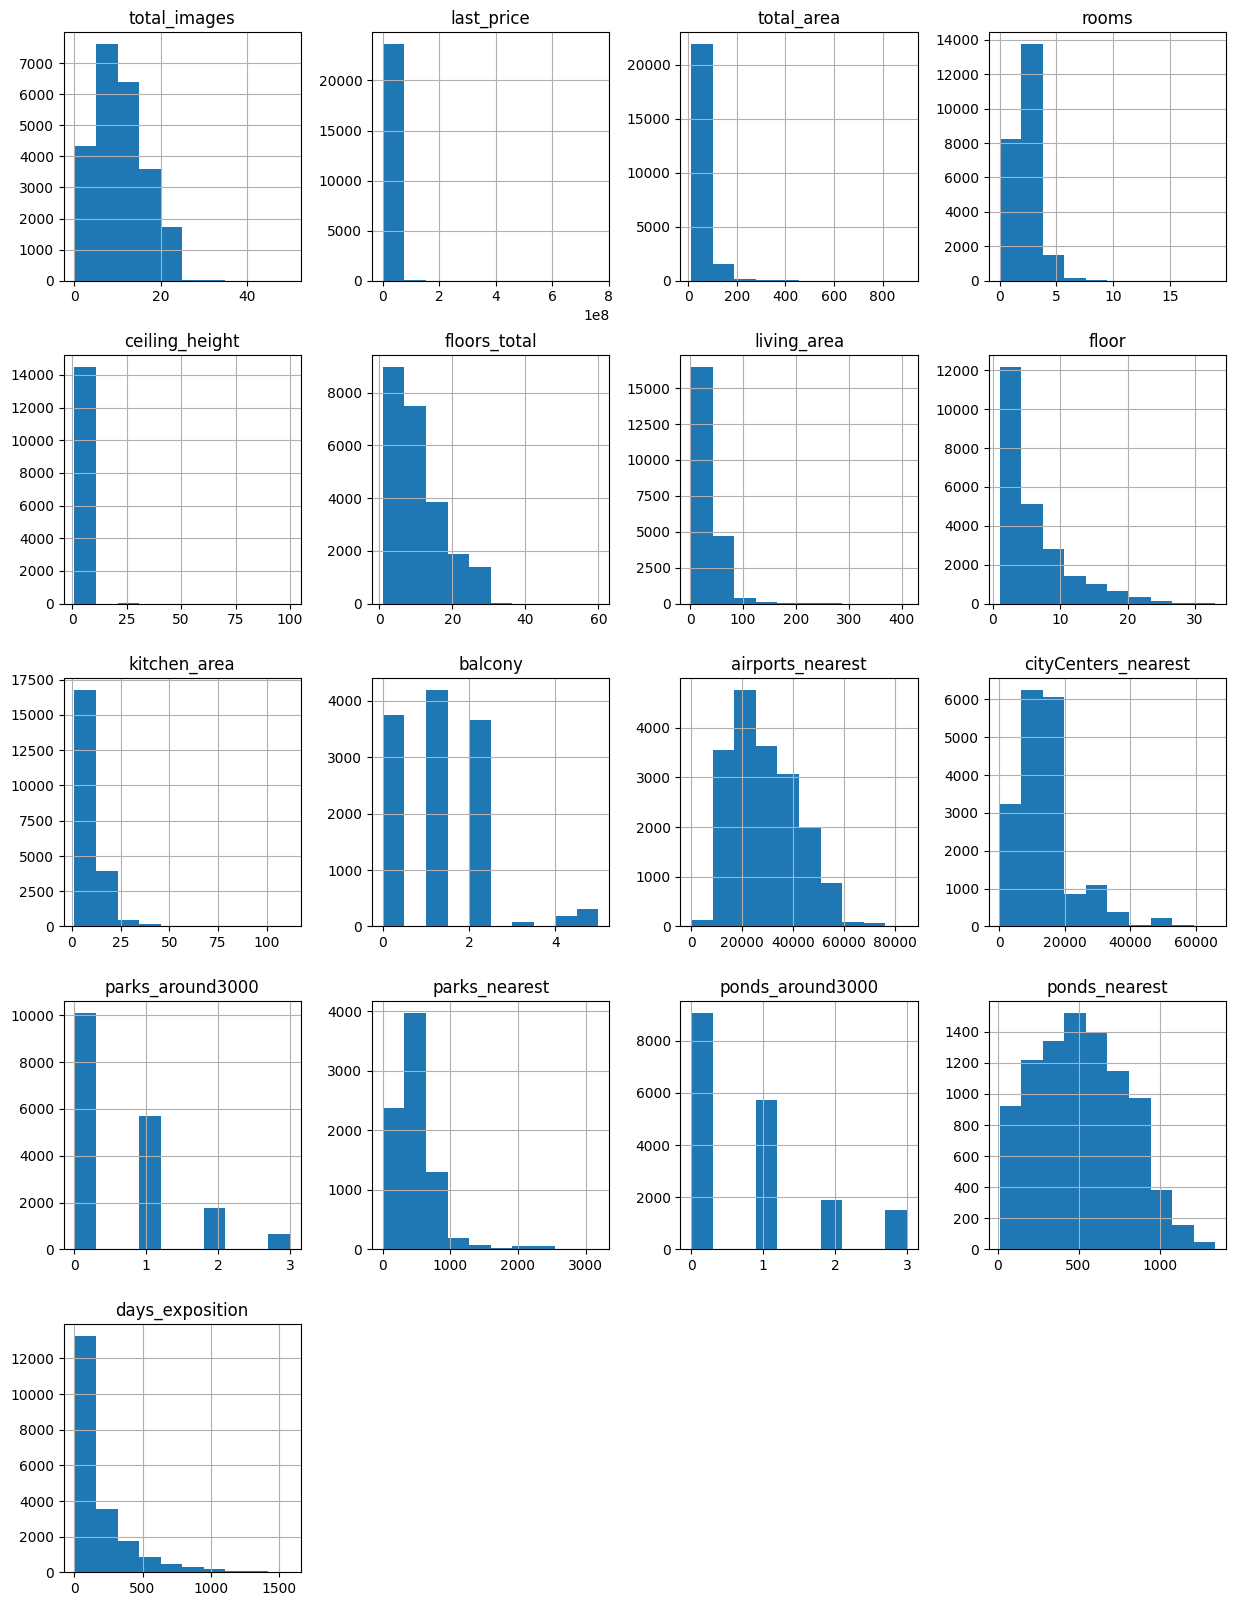

In [7]:
data.hist(figsize = (15,20))

In [8]:
data.duplicated().sum()

0

**Вывод 1.**

Таблица содержит пропуски в столбцах с данными о высоте потолков (ceiling_height),думаю не все продавцы знают этот показатель, кроме того в столбце есть некорректные значения-100м, 20924 пропуска в столбце апартаменты (is_apartment), скорее всего продавцы не заполняли эти пункты так как не все знают характеристики данного вида недвижимости.   parks_nearest, ponds_nearest, airports_nearest, cityCenters_nearest - вносятся автоматически системой, почему-то не были заполнены. Пропуски в столбцах kitchen_area и living_area могут быть не заполнены по причине необязательности заполнения, и к тому же, если квартира является студией,то данные о площади кухни не вносятся. Пропуски в столбце balcony, скорее всего связаны с отсутствием таковых поэтому заполним их '0'. По гистограммам большинства столбцов видны аномальные значения будем от них избавляться.

### 2  Предобработка данных

Заполняем пропуски там, где это возможно. Начнем по порядку, со столбца is-apartament.

In [9]:
print(data['is_apartment'].isnull().sum())
data['is_apartment'].value_counts()

20924


False    2725
True       50
Name: is_apartment, dtype: int64

Пропуски в количестве > 20000 заполнять False плохая идея,так как получится что из всей таблицы только 50 объектов недвижимости являются апартаментами. Оставим значения в столбце без изменений.

In [10]:
data['parks_nearest'].isnull().sum()

15620

In [11]:
data['ponds_nearest'].isnull().sum()

14589

Расстояние до парков и водоемов должны загружаться автоматически,в нашем случае наблюдается коллосальное количество пропусков,66% и 62% соответственно,более половины датафрейма, вручную, к сожалению, их заполнить невозможно, поэтому оставляем их в покое.

In [12]:
print(data['parks_around3000'].isnull().sum())
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'].isnull().sum()

5518


0

In [13]:
print(data['ponds_around3000'].isnull().sum())
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'].isnull().sum()

5518


0

В столбцах ponds_around3000 и parks_around3000 (число водоемов и парков) пропуски могут быть по причине отсутствия таковых рядом с объектом недвижимости,доля пропусков 23%, думаю, можем заполнить их '0'.

In [14]:
print(data['balcony'].isnull().sum())
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isnull().sum()

11519


0

Как и планировали заменили отсутствующие данные о наличии балконов '0'.

In [15]:
print(data['ceiling_height'].isnull().sum())
data['ceiling_height'].describe()

9195


count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Минимальная высота потолков 1 метр. Оставим минимальной высоту 2.2 м и максимальную 6 м. все таки у нас Санкт -Петербург в списке.

In [16]:
data.loc[data['ceiling_height'] < 2.2, 'ceiling_height'] = np.nan
data.loc[data['ceiling_height'] > 6.0, 'ceiling_height'] = np.nan

In [17]:
data['ceiling_height'].describe()

count    14461.000000
mean         2.727347
std          0.278089
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

Медианное значение высоты потолков - 2.6 м,  заполняем пропущенные данные медианой

In [18]:
med_ceiling_height = data['ceiling_height'].median()
med_ceiling_height

2.65

In [19]:

data['ceiling_height'] = data['ceiling_height'].fillna(med_ceiling_height)
data['ceiling_height'].isnull().sum()


0

In [20]:
data['cityCenters_nearest'].isnull().sum()

5519

In [21]:
data['airports_nearest'].isnull().sum()

5542

Также как расстояния до парков и водоемов, расстояния до ценнтра и до аэропорта загружаются автоматически, но в данном случае количество пропусков 23%, к сожалению их заполнить невозможно, поэтому оставляем.

In [22]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [23]:
data['year_exposition'] = data['first_day_exposition'].dt.year

In [24]:
data['year_exposition'].unique()

array([2019, 2018, 2015, 2017, 2016, 2014], dtype=int64)

In [25]:
data['days_exposition'].isnull().sum()  

3181

In [26]:
data.loc[data['days_exposition'].isnull(), 'year_exposition'].value_counts()

2019    1796
2018     959
2017     271
2015      70
2016      67
2014      18
Name: year_exposition, dtype: int64

In [27]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [28]:
med_days_exposition = data['days_exposition'].median()
print(med_days_exposition)      
data['days_exposition'] = data['days_exposition'].fillna(med_days_exposition)
data['days_exposition'].isnull().sum()      

95.0


0

Практически половина пропусков приходится на 2019 год, с 2014 года пропуски увеличиваются,с 2017 года особенно. Количество дней публикации должно определятся автоматически, похоже на какой то сбой. Заменим медианным значением. 

Пропуски в столбцах locality_name и floors_total составляют 0,2% и 0,4% соответственно и они не окажут какого либо значимого влияния на результат исследования, поэтому можем их удалить. Возможно, продавцы ,публикуя объявление считают что данный ресурс ограничивается вариантами данного населенного пункта и потому не считают нужным указывать его. Пропуски в столбце количество этажей могут быть связаны с человеческим фактором.

In [29]:
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)
print(data['locality_name'].isnull().sum()) 
print(data['floors_total'].isnull().sum()) 

0
0


У нас остались пропуски в living_area и kitchen_area проверим предположение,что они относятся к студиям. Процент пропусков здесь 8% и 9,6%, 1903 и 2278 шт.

In [30]:
data.query('rooms == 0')[['kitchen_area', 'living_area']].isnull().sum()

kitchen_area    194
living_area      11
dtype: int64

Лишь незначительная часть пропусков в данных столбцах относится к студиям,но так как это один из показателей для анализа, заменим пропущенные значения медианным. Основная часть жилого фонда была построена во 2-й половине 20-го века,как правило это типовые многоэтажки с одинаковым метражом кухонь, не зависимо от количества комнат в квартие. Есть новостройки с большими площадями квартир, здесь не угадать может и 1 к квартира иметь кухню 20 кв.м и 3-к квартира-кухню 10 кв. м. Поэтому заполнять пропуски по количеству комнат не имеет смысла. Медиана площади кухни у нас 9.1 кв.м очень реалистично. Так же пропуски в living_area заполним медианой.

In [31]:


med_living = data['living_area'].median()
print(med_living)      
data['living_area'] = data['living_area'].fillna(med_living)
print(data['living_area'].isnull().sum())     

med_kitchen = data['kitchen_area'].median()
print(med_kitchen)      
data['kitchen_area'] = data['kitchen_area'].fillna(med_kitchen)
print(data['kitchen_area'].isnull().sum())     




30.0
0
9.1
0


Обновим данные по пропускам.

In [32]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition             0
year_exposition             0
dtype: int64

В целом ситуация улучшилась , мы избавились от пропусков в столбцах: balcony, ceiling_height, parks_around3000, ponds_around3000, days_exposition, living_area, kitchen_area.

Изменим типы данных в стобцах, там где это необходимо.

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

In [34]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,30.0,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2018


Приведем last_price к целочисленному типу, копейки при покупке недвижимости не используются.ceiling_height, living_area, kitchen_area- округлим до 1го знака после запятой, floors_total , balcony, days_exposition на int. parks_around3000, ponds_around3000 - переводим в целочисленный формат.В first_day_exposition значения сейчас - строки, переведем в даты datetime.

Создадим список столбцов для перевода в int.

In [35]:
list_int = ['last_price','floors_total','balcony','days_exposition',\
      'parks_around3000','ponds_around3000',]

    
for column in list_int:
    data[column] = data[data[column].notnull()][column].astype('int')



Создадим список для округления до 1 знака до запятой

In [36]:
list_1 = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']

for column in list_1:
    data[column] =data[data[column].notnull()][column].round(1)


In [37]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Посмотрим результат

In [38]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95,2019
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,NaN,...,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,2018
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,2015
3,0,64900000,159.0,2015-07-24,3,2.6,14,30.0,9,NaN,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,2015
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,2018


Проверим дубликаты

In [39]:
data.duplicated().sum()

0

In [40]:
data['locality_name'].sort_values()
data['locality_name'].unique() 

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [41]:
data['locality_name'].value_counts()

Санкт-Петербург                    15651
посёлок Мурино                       520
посёлок Шушары                       439
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

Можно заметить что в слово поселок имеет разное написание, через е и чрез ё, а еще некоторые населенные пункты обозначают 'поселок городстого типа Рябово' или 'поселок Рябово'.Всего 364 наименования.

In [42]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('поселок городстого типа Рябово', 'поселок Рябово')        
data['locality_name'] = data['locality_name'].str.replace('посёлок Мурино', 'Мурино')       
data['locality_name'] = data['locality_name'].str.replace('деревня Кудрово', 'Кудрово')   

In [43]:
data['locality_name'].value_counts()

Санкт-Петербург                     15651
поселок Мурино                        552
Кудрово                               470
поселок Шушары                        439
Всеволожск                            398
                                    ...  
поселок Левашово                        1
садовое товарищество Новая Ропша        1
деревня Шпаньково                       1
деревня Курковицы                       1
поселок Дзержинского                    1
Name: locality_name, Length: 329, dtype: int64

Осталось 329 населенных пункта. Удалили 35 дубликатов.

In [44]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,95,2019
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,NaN,...,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,2018
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,2015
3,0,64900000,159.0,2015-07-24,3,2.6,14,30.0,9,NaN,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,2015
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,2018


**Вывод 2.**

Мы заменили пропущенные значения в столбцах: ceiling_height, days_exposition медианным значением. В столбце balcony пропуски заменили '0',так как если продавец проигнорировал этот параметр, скорее всего балкон отсутствует. В parks_around3000, ponds_around3000 заменили пропуски "0", будем считать, что система не нашла данные объекты в радиусе 3000м. В столбцах living_area, kitchen_area заменили пропуски медианным значением, эти пропуски имеют по большей части случайный,человеческий фактор. В столбцах: parks_nearest, ponds_nearest, cityCenters_nearest, airports_nearest оставили пропуски так как данные о расстоянии до объектов должны заполняться автоматически на основе картографических данных и не подразумевают ручного расчета. Пропуски в столбцах locality_name и floors_total составляют 0,2% и 0,4% , их удалили по причине невозможности воостановления или замены этих данных каким либо значением. И категория is_apartment проверке не поддается,тоже без изменений, продавцы недвижимости игнорируют этот параметр в силу того что он новый для рынка недвижимости и возможно был добавлен гораздо позже в систему параметров жилья, оставляем. Привели last_price к целочисленному типу,так как копейки при покупке недвижимости не используются.ceiling_height, living_area, kitchen_area- округлили до 1го знака после запятой, floors_total , balcony, days_exposition на int. parks_around3000, ponds_around3000 - переводим в целочисленный формат.В first_day_exposition значения перевели в даты datetime. Избавились от неявных дубликатов в количестве 35 штук.

### 3 Посчитайте и добавьте в таблицу новые столбцы

Посчитаем цену квадратного метра

In [45]:
data['price_square_meter'] = data['last_price'] / data['total_area']

Приведем к типу int

In [46]:
data['price_square_meter'] = data['price_square_meter'].astype('int')


Создадим столбец дня недели

In [47]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

Столбец месяца

In [48]:
data['month_exposition'] = data['first_day_exposition'].dt.month

Категории этажей

In [49]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
    
data['floor_category'] = data.apply(floor_category, axis = 1)    
    
    

Столбец с расстояниями до центра в км. Округлим до целых значений.

In [50]:
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest']/1000,0)

In [51]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year_exposition,price_square_meter,weekday_exposition,month_exposition,floor_category,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,482.0,2,755.0,95,2019,120370,3,3,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,NaN,...,NaN,0,NaN,81,2018,82920,1,12,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,90.0,2,574.0,558,2015,92785,3,8,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2.6,14,30.0,9,NaN,...,84.0,3,234.0,424,2015,408176,4,7,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,112.0,1,48.0,121,2018,100000,1,6,другой,8.0


**Вывод 3.**

Добавили в таблицу столбцы :
 - цена одного кв. метра
 - день недели публикации объявления (0-понедельник, 1 - вторник и так далее)
 - месяц публикации объявления
 - год публикации объявления
 - тип этажа квартиры (значения- "первый", "последний", "другой")
 - расстояние до центра города в километрах.



### 4 Проведите исследовательский анализ данных

Изучим параметры объектов

In [52]:
data[['total_area','kitchen_area', 'last_price', 'rooms'\
      , 'ceiling_height','floor','floors_total'\
      ,'cityCenters_nearest_km','parks_nearest','airports_nearest']].describe()

,total_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,cityCenters_nearest_km,parks_nearest,airports_nearest
count,23565.000000,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,18064.000000,8030.000000,18041.000000
mean,60.322813,10.423183,6.540058e+06,2.070656,2.680437,5.878124,10.675875,14.186504,490.580448,28797.082701
std,35.657072,5.631754,1.091093e+07,1.078591,0.226902,4.871485,6.594823,8.621131,341.572956,12632.499735
min,12.000000,1.300000,1.219000e+04,0.000000,2.200000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,40.000000,7.300000,3.400000e+06,1.000000,2.600000,2.000000,5.000000,9.000000,288.000000,18565.000000
50%,52.000000,9.100000,4.646000e+06,2.000000,2.600000,4.000000,9.000000,13.000000,455.000000,26757.000000
75%,69.700000,11.400000,6.790000e+06,3.000000,2.700000,8.000000,16.000000,16.000000,612.000000,37273.000000
max,900.000000,112.000000,7.630000e+08,19.000000,6.000000,33.000000,60.000000,66.000000,3190.000000,84869.000000


 Определим выбросы по каждому из набора данных (что лежит за пределами "усов")

Проанализируем параметры:'total_area','kitchen_area', 'last_price', 'rooms'.
Построим график 'ящик с усами'и определим границы каждого показателя.

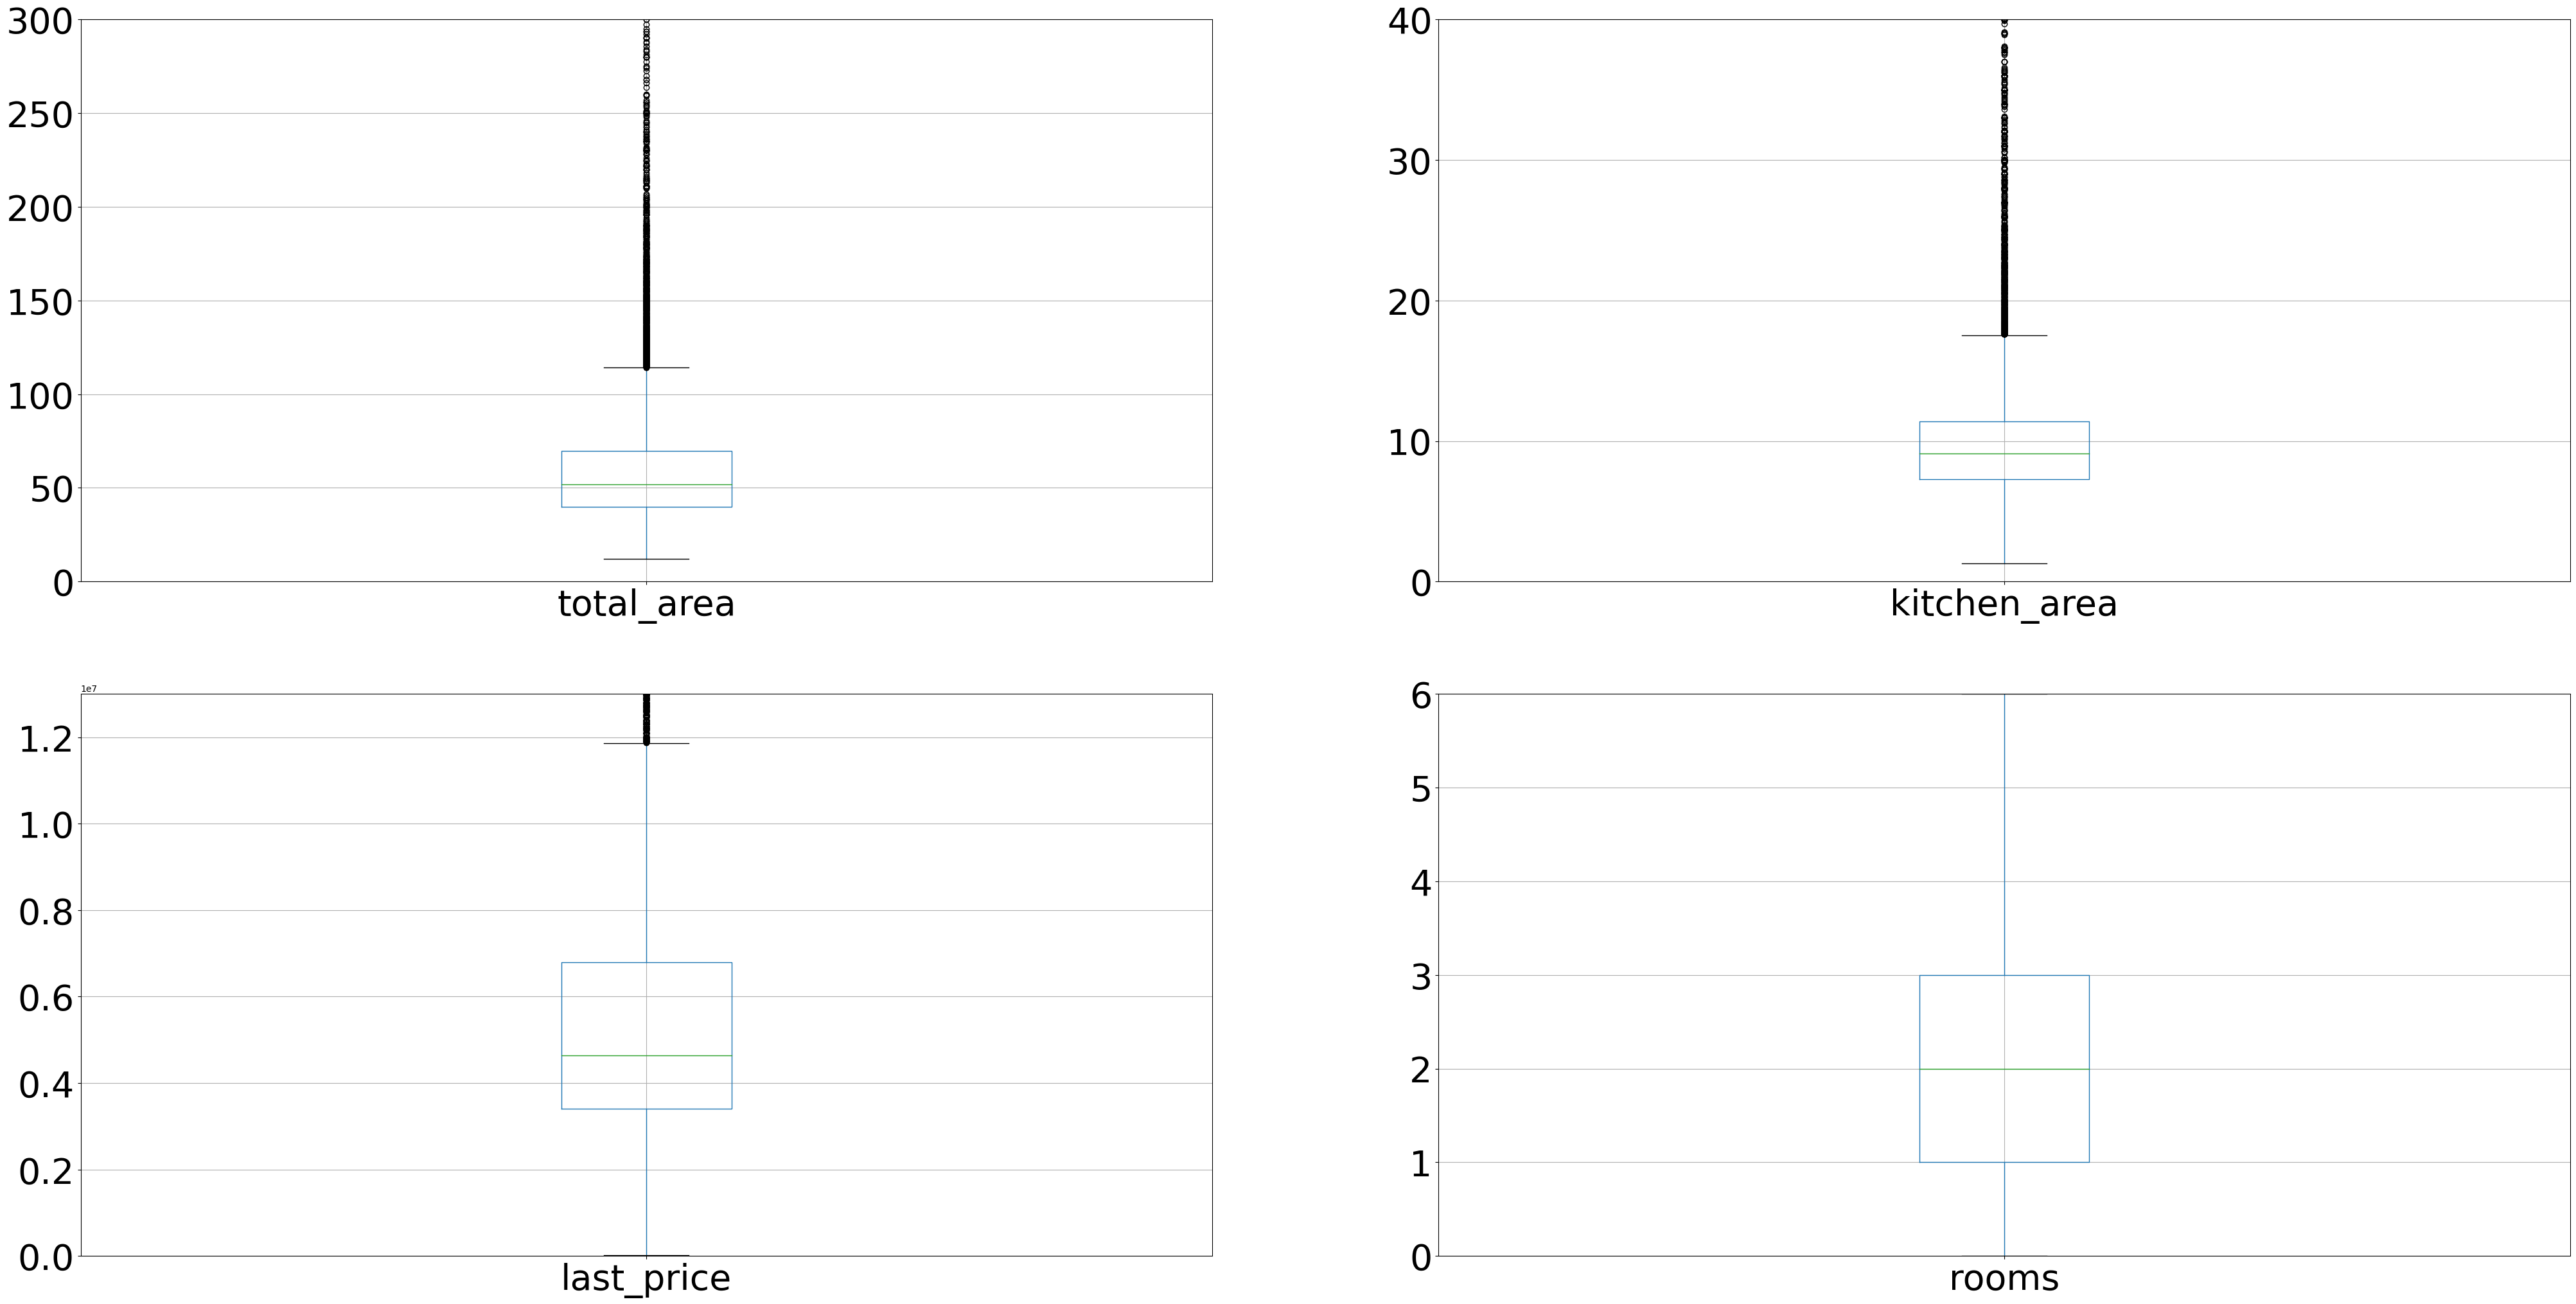

In [53]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(50,25))
column_list = ['total_area','kitchen_area', 'last_price', 'rooms']
               
ylims = [300, 40, 13000000, 6]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = data.boxplot(column=column_list[count], ax=axes[r,c], fontsize=40)
        ax.set_ylim([0, ylims[count]])
        count += 1

Итак: 
  - total_area - 20-120 кв.м;
  - kitchen_area - 1 - 19 кв.м;
  - last_price - 0 - 12 000 000 руб
  - rooms - 0 - 6 комнат

Проанализируем параметры:'ceiling_height', 'floor', 'floors_total', 'cityCenters_nearest_km'

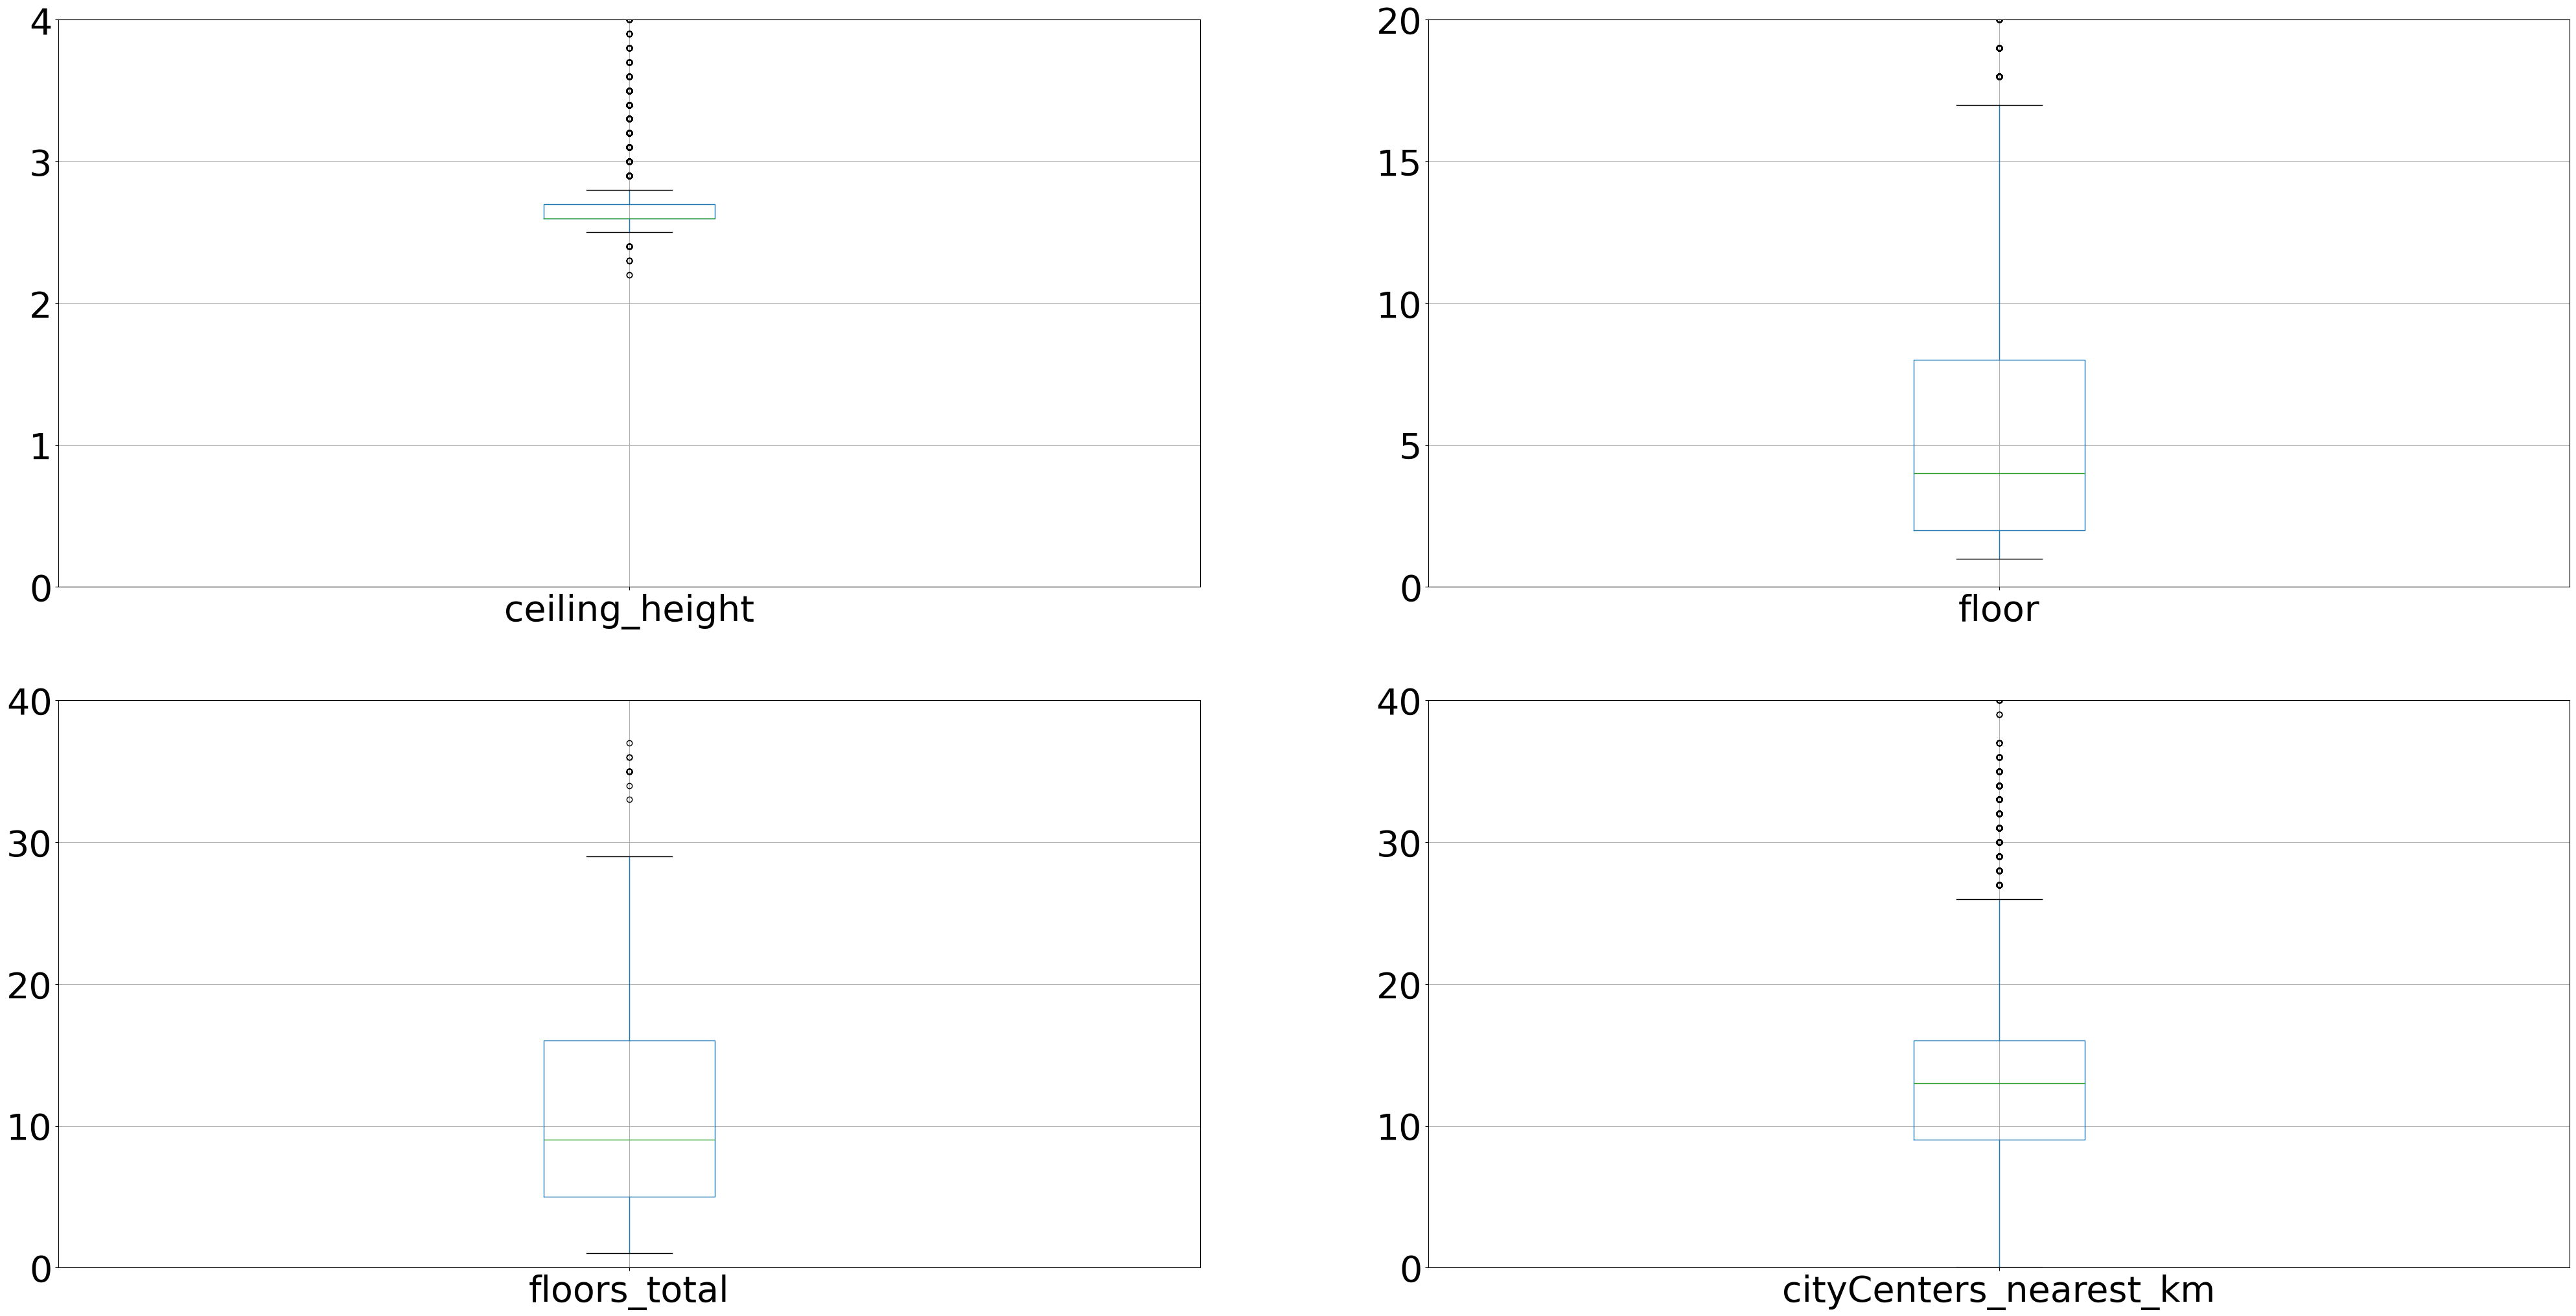

In [54]:
rows = 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(50,25))
column_list = ['ceiling_height','floor','floors_total','cityCenters_nearest_km']
ylims = [4, 20, 40, 40]
count = 0
for r in range(rows):
    for c in range(cols):
        ax = data.boxplot(column=column_list[count], ax=axes[r,c], fontsize=40)
        ax.set_ylim([0, ylims[count]])
        count += 1

 - ceiling_height - 2.6-2.8 м.
 - floor -1 - 17 этаж
 - floors_total - 1- 29 этажей
 - сityCenters_nearest_km - 0 - 26 км.

(0.0, 150.0)

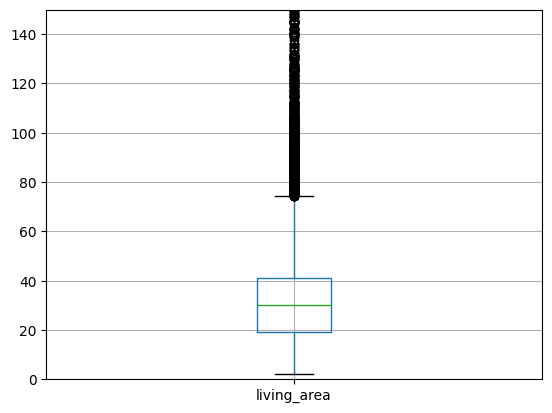

In [55]:
data.boxplot('living_area')
plt.ylim(0, 150)

- living_area - 3-75 кв.м

array([[<AxesSubplot: title={'center': 'total_area'}>,
        <AxesSubplot: title={'center': 'kitchen_area'}>,
        <AxesSubplot: title={'center': 'last_price'}>],
       [<AxesSubplot: title={'center': 'rooms'}>,
        <AxesSubplot: title={'center': 'ceiling_height'}>,
        <AxesSubplot: title={'center': 'floor'}>],
       [<AxesSubplot: title={'center': 'floors_total'}>,
        <AxesSubplot: title={'center': 'cityCenters_nearest_km'}>,
        <AxesSubplot: title={'center': 'parks_nearest'}>],
       [<AxesSubplot: title={'center': 'airports_nearest'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

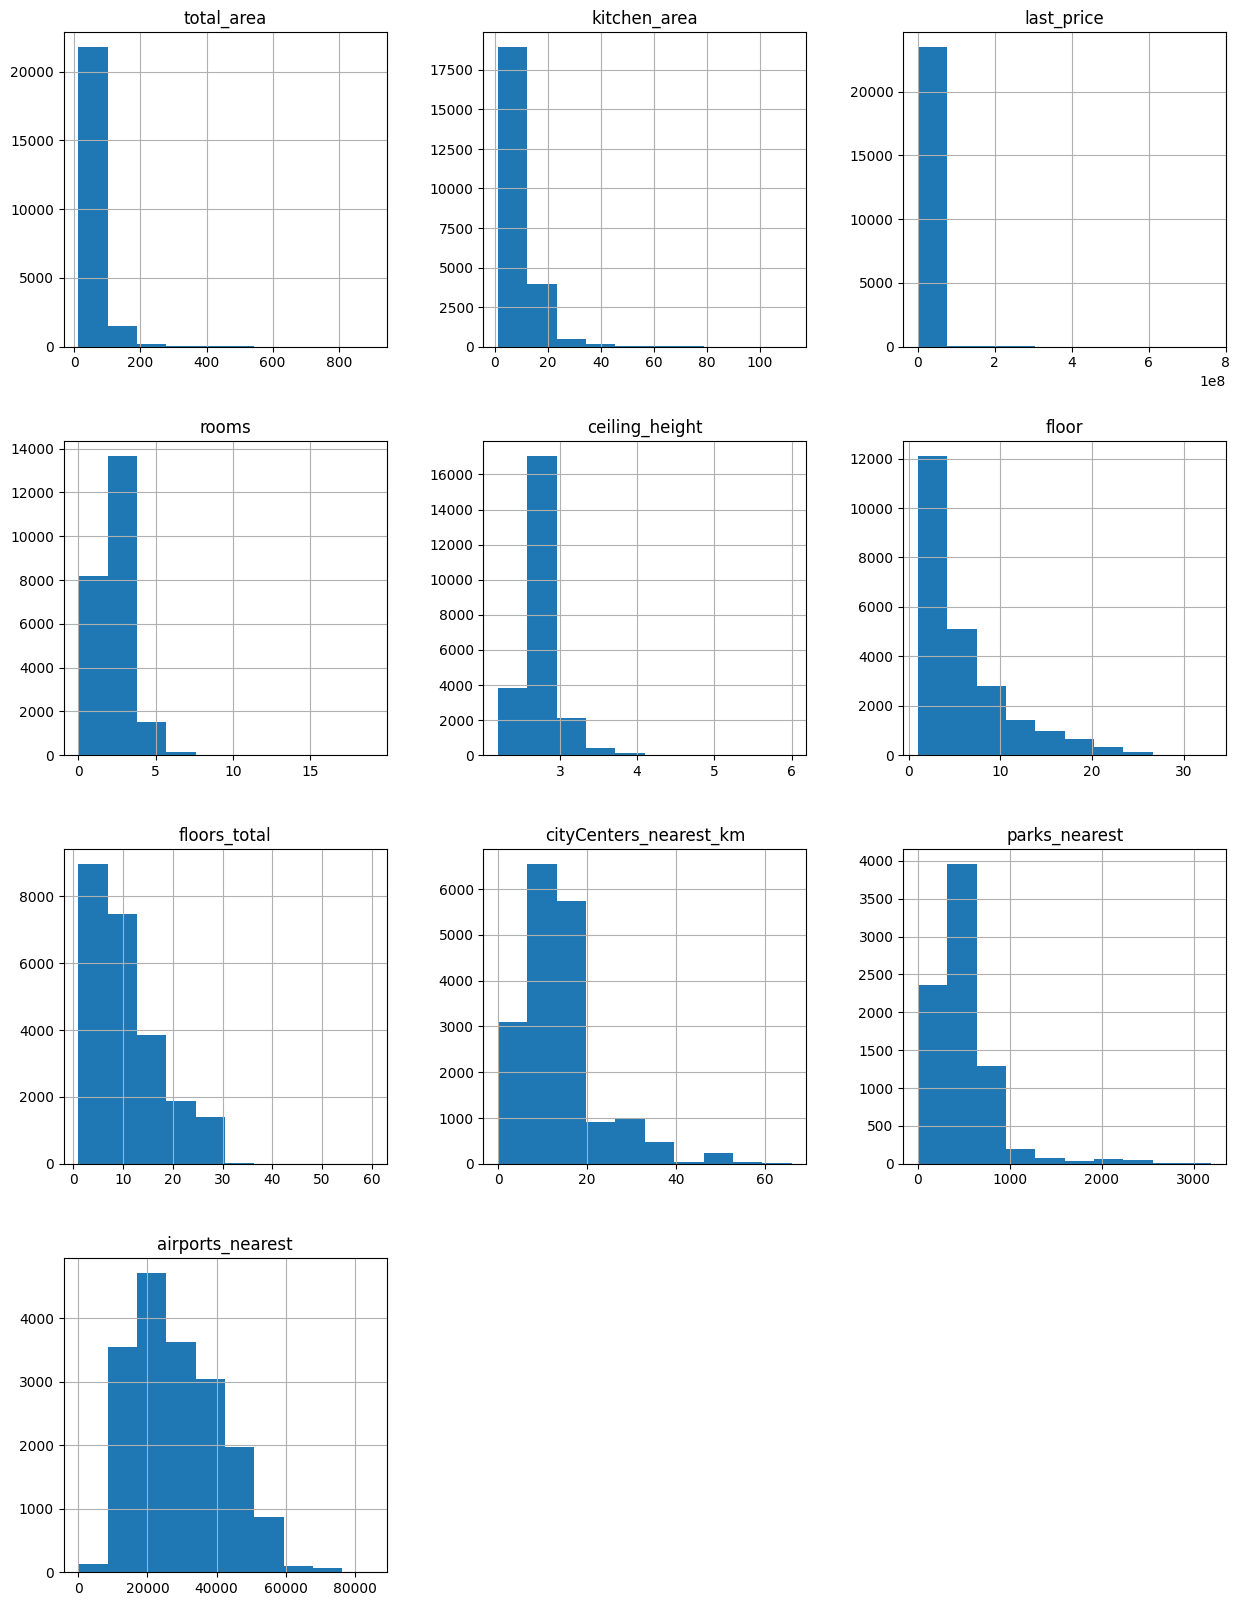

In [56]:
data_hist = data[['total_area','kitchen_area', 'last_price', 'rooms'\
      , 'ceiling_height','floor','floors_total'\
      ,'cityCenters_nearest_km','parks_nearest','airports_nearest']]
data_hist.hist(figsize = (15,20))

Опишем наблюдения:
- total_area - здесь все приемлемо, min-12 , max- 900 кв.м. Основная масса вариантов 75%, имеют площадь до 80 кв.м 
- kitchen_area - min -1.3, max- 112 кв.м. Вполне реалистично, 1.3 может быть выделенной зоной под кухню в какой нибудь студии. Около 19 тыс вариантов имеют площадь до 9 кв.м
 - last_price - max-763 млн. похоже на дворец, а вот min цена близкая к нулю вызывает вопрос. Большая часть вариантов имеют цену не выше 8 млн.руб
 - rooms- здесь нулевые значения допустимы -это студии , больше всего на рынке предложений 2-к квартир.
 - ceiling_height- здесь все в порядке мы ранее ограничили min и max 2.2 и 6.0 м, основная высота в районе 2.6-2.8 м.
 - floor - с этажами понятно, варианты от 1 до 30 . Почти половина -это варианты не выше 5-го этажа.
 - floors_total - дома высотой от 1-го до 60 этажей. В основном  до 5-ти(около 9000 вариантов) и от 5- 9- ти этажей(7000 вариантов) около 50%
 - cityCenters_nearest_km - здесь уместны нулевые значения (самый центр), по гистограмме видно неравномерное распределение вариантов. Это связано с большим количеством пропусков в данных.
 - parks_nearest- тоже неравномерная гистограмма, есть в данных пропуски.
 - airports_nearest - min- 0, ктото предлягает жилье прямо на территории аэропорта, max- чуть более  80 км. В основном варианты в 20-40 км от аэропорта.
 
 

<AxesSubplot: >

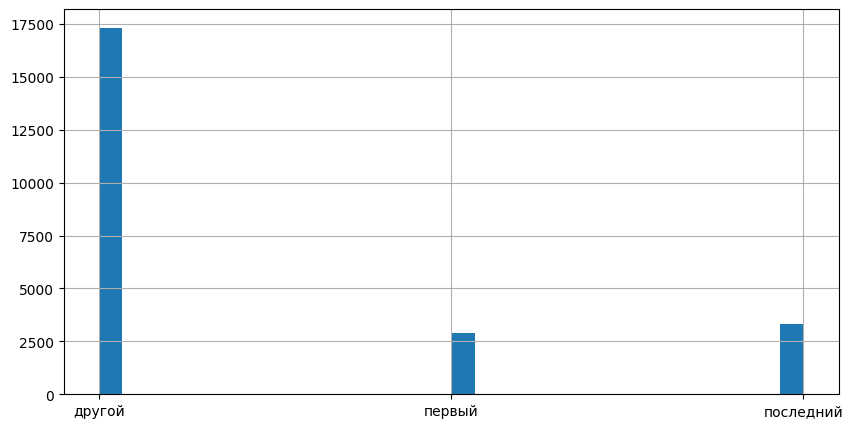

In [57]:
data['floor_category'].hist(bins=30,figsize = (10,5))

В категориях этажей лидируют "другие", что логично ,их больше чем первых и последних.На втором месте "последний "- около 3000 вариантов и замыкает тройку "первый"- чуть более 2500 вариантов.

AxesSubplot(0.125,0.11;0.775x0.77)


2     2636
3     2575
11    2360
4     2356
10    2108
9     1972
6     1747
8     1739
7     1686
12    1638
1     1487
5     1261
Name: month_exposition, dtype: int64

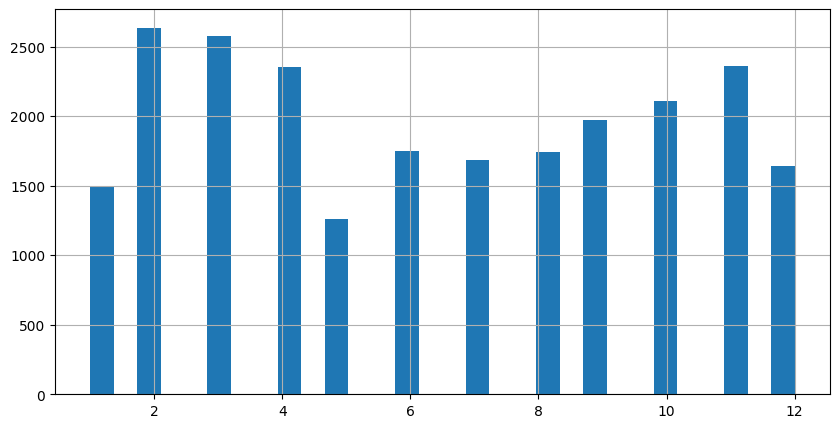

In [58]:
print(data['month_exposition'].hist(bins=30,figsize = (10,5)))

data['month_exposition'].value_counts()


По месяцам лидер по размещению объявлений - февраль, далее - март, ноябрь. В мае самый низкий показатель, а также в декабре-январе наблюдается спад активности продавцов.

<AxesSubplot: >

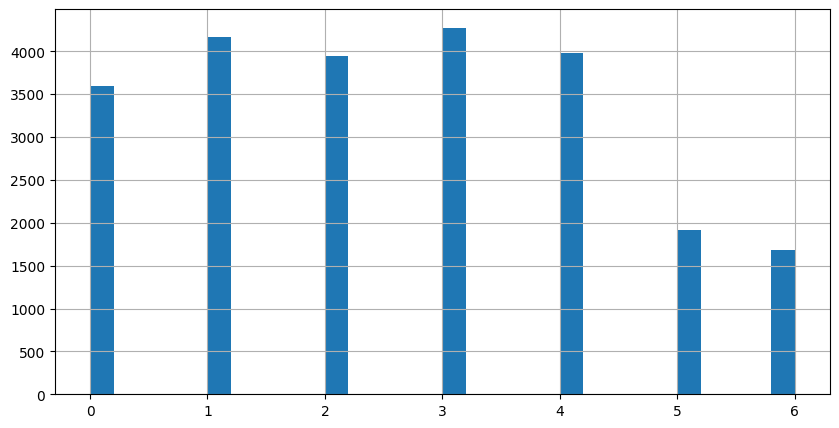

In [59]:
data['weekday_exposition'].hist(bins=30,figsize = (10,5))

В будние дни активность больше чем в выходные.

(0.0, 3000.0)

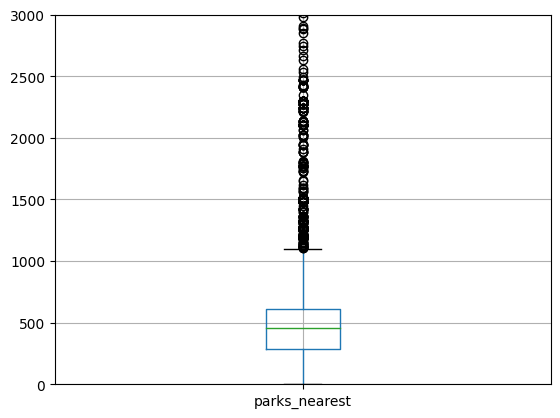

In [60]:
data.boxplot('parks_nearest')
plt.ylim(0, 3000)

(0.0, 150000.0)

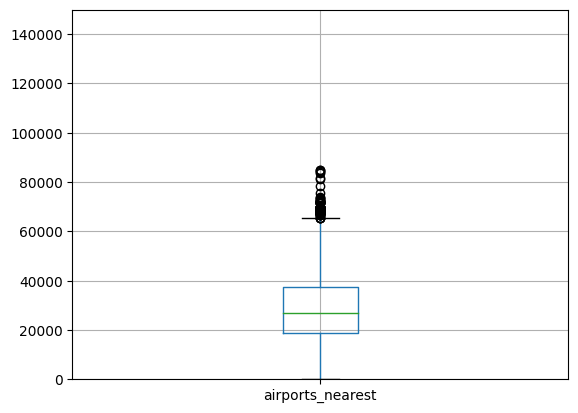

In [61]:
data.boxplot('airports_nearest')
plt.ylim(0, 150000)

- Расстояние до парка- 0 - 1200м.
- Расстояние до аэропорта - 0 - 62000м.

(0.0, 450.0)

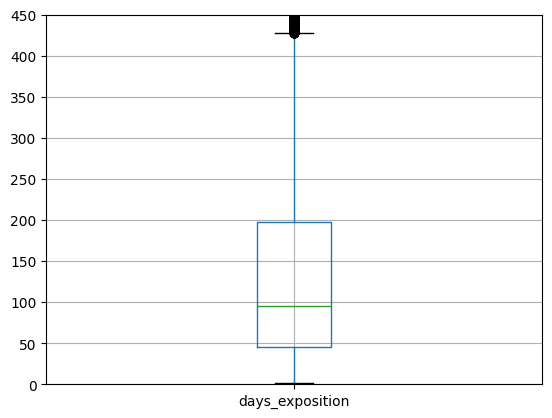

In [62]:
data.boxplot('days_exposition')
plt.ylim(0, 450)

- days_exposition -0-425 дней. Медиана - 95 дней

<AxesSubplot: ylabel='Frequency'>

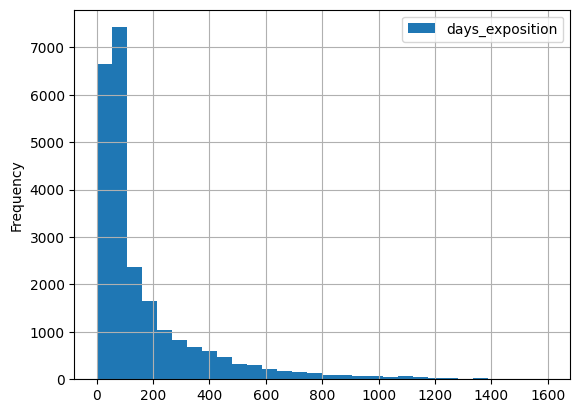

In [63]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1600))

In [64]:
new_data = data.query('days_exposition <=425')

 Среднее значение, медиана и межквартильный размах показателя days_exposition.

In [65]:
new_data['days_exposition'].describe()

count    21212.000000
mean       112.558080
std         96.022729
min          1.000000
25%         45.000000
50%         95.000000
75%        146.000000
max        425.000000
Name: days_exposition, dtype: float64

Есть квартиры, которые продавались 14 месяцев. До удаления выбивающихся значений были варианты объектов находящихся в базе 5 лет.  Вполне возможно  что это те объявления, которые вовремя не были закрыты, из-за этого срок продажи не соответствует реальным и имеет очень большое значение.
Среднее время продажи - 112 дней, около 4 месяцев. Медианное - 95 дней.
3 месяца для продажи квартиры - очень неплохой срок. 

Функция для работы с выбивающимися значениями

In [66]:
def quartile_rang(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
# Столбцы с выбросами
list_col = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'rooms','airports_nearest','parks_nearest']
for col in list_col:
    data[col] = quartile_rang(data, col)


In [67]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23565.0,9.878421e+00,5.681156e+00,0.0,6.0,9.0,14.0,50.0
last_price,21519.0,4.837115e+06,2.215774e+06,12190.0,3300000.0,4400000.0,5999999.5,11866860.0
total_area,22326.0,5.431969e+01,1.933103e+01,12.0,39.4,50.0,65.5,114.2
rooms,23371.0,2.030208e+00,9.735631e-01,0.0,1.0,2.0,3.0,5.0
ceiling_height,23565.0,2.680437e+00,2.269020e-01,2.2,2.6,2.6,2.7,6.0
floors_total,23565.0,1.067588e+01,6.594823e+00,1.0,5.0,9.0,16.0,60.0
living_area,22688.0,3.120846e+01,1.303554e+01,2.0,19.0,30.0,39.5,74.2
floor,23565.0,5.878124e+00,4.871485e+00,1.0,2.0,4.0,8.0,33.0
kitchen_area,22003.0,9.309526e+00,2.753359e+00,1.3,7.1,9.1,10.9,17.5
balcony,23565.0,5.936771e-01,9.606601e-01,0.0,0.0,0.0,1.0,5.0


In [68]:

print(min(data['price_square_meter']))

print(min(data['total_area']))
last_price_new = min(data['price_square_meter'])* min(data['total_area'])
print(last_price_new)

data = data[data['last_price'] >= 126084.0 ]
data['last_price'].describe()

111
12.0
1332.0


count    2.151800e+04
mean     4.837339e+06
std      2.215581e+06
min      4.300000e+05
25%      3.300000e+06
50%      4.400000e+06
75%      6.000000e+06
max      1.186686e+07
Name: last_price, dtype: float64

Проанализируем какие факторы больше всего влияют на общую стоимость объекта.
Изучим, зависит ли цена от: 
- общей площади
- жилой площади
- площади кухни
- количества комнат
- этажа
- даты размещения

0.6946246136290717


<AxesSubplot: xlabel='last_price', ylabel='total_area'>

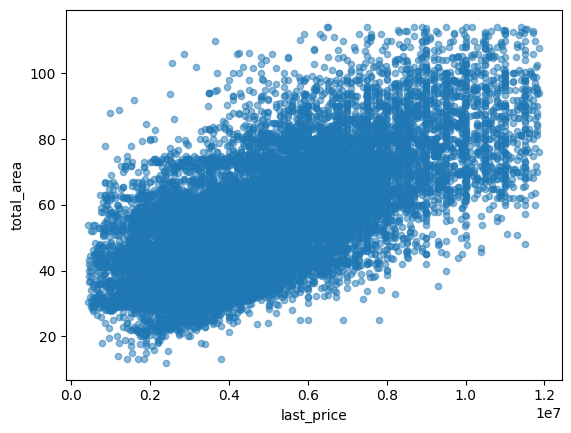

In [69]:
print(data['last_price'].corr(data['total_area']))
data.plot( x ='last_price', y = 'total_area', kind ='scatter',alpha = 0.5)


Чем больше площадь тем выше цена. Коофициент корреляции Пирсона - 0.70

0.5394918185409393


<AxesSubplot: xlabel='last_price', ylabel='living_area'>

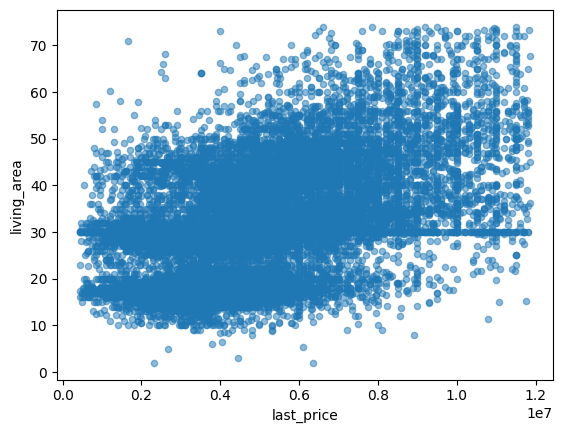

In [70]:
print(data['last_price'].corr(data['living_area']))
data.plot( x ='last_price', y = 'living_area', kind ='scatter',alpha = 0.5)

С жилой площадью такдже как и с общей , чем болеше тем дороже. Устойчивая взаимосвязь касательно объектов до 75 кв.м. Коофициент корреляции - 0.55

0.45413081606529554


<AxesSubplot: xlabel='last_price', ylabel='kitchen_area'>

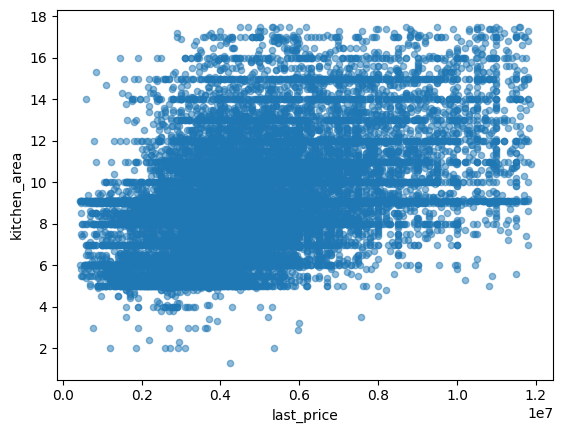

In [71]:
print(data['last_price'].corr(data['kitchen_area']))
data.plot( x ='last_price', y = 'kitchen_area', kind ='scatter',alpha = 0.5)

Корреляция 0,45. Все таки общая и жилая площади чуть большее влияние имеют на стоимость.

0.44896519743429214


,mean,count,median
rooms,,,
5.0,8.252059e+06,118,8945000.0
4.0,6.908274e+06,752,6965000.0
3.0,5.989371e+06,4918,5700000.0
2.0,5.005005e+06,7557,4650000.0
1.0,3.757081e+06,7964,3600000.0
0.0,2.924644e+06,192,2700000.0


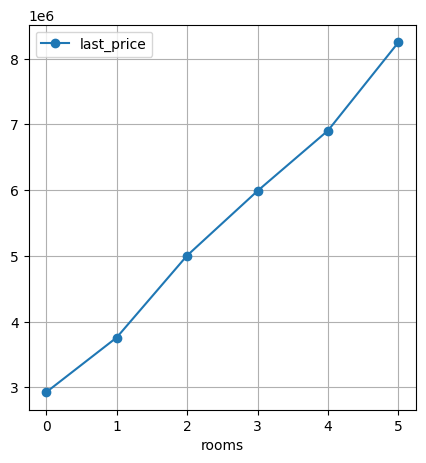

In [72]:
print(data['last_price'].corr(data['rooms']))
data.pivot_table(index='rooms', values='last_price')\
    .plot(grid=True, style='o-', figsize=(5, 5))

data_table_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc=['mean','count','median']) 
data_table_rooms.columns = ['mean', 'count', 'median']

data_table_rooms.sort_values('median', ascending = False)
    


С ростом количества комнат растет и цена

AxesSubplot(0.125,0.11;0.775x0.77)


,mean,count,median
floor_category,,,
другой,5.031206e+06,15733,4590000.0
первый,4.125910e+06,2798,3800000.0
последний,4.482624e+06,2987,4000000.0


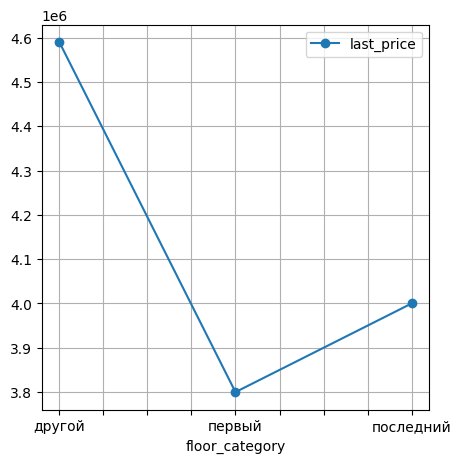

In [73]:

print(data.pivot_table(index='floor_category', values='last_price', aggfunc='median')\
    .plot(grid=True, style='o-', figsize=(5, 5)))
data_table = data.pivot_table(index='floor_category', values='last_price', aggfunc=['mean','count','median']) 
data_table.columns = ['mean', 'count', 'median']

data_table
    

 В среднем квартиры на 1-м этаже на 260 000 дешевле чем на последнем и на 700 000 руб дешевле чем на любом другом. 

AxesSubplot(0.125,0.11;0.775x0.77)


,mean,count,median
month_exposition,,,
4,4.943327e+06,2158,4552500.0
12,4.854752e+06,1494,4480000.0
11,4.865480e+06,2144,4455000.0
9,4.953425e+06,1793,4450000.0
1,4.792336e+06,1346,4400000.0
2,4.834506e+06,2411,4400000.0
3,4.798156e+06,2353,4400000.0
10,4.806094e+06,1938,4400000.0
8,4.837171e+06,1592,4380000.0


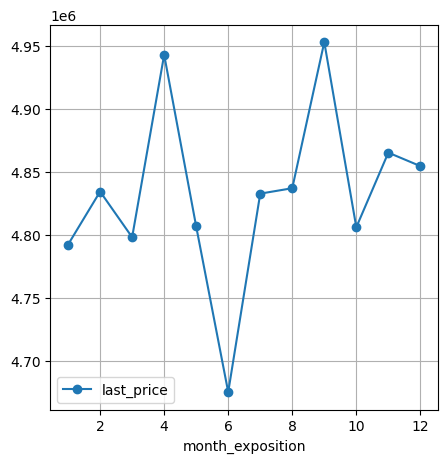

In [74]:
print(data.pivot_table(index='month_exposition', values='last_price')\
    .plot(grid=True, style='o-', figsize=(5, 5)))


data_table_month = data.pivot_table(index='month_exposition', values='last_price', aggfunc=['mean','count','median']) 
data_table_month.columns = ['mean', 'count', 'median']

data_table_month.sort_values('median', ascending = False)





 Квартиры выставленные в июне (4 290 000р) дешевле чем выставленные в другие месяцы, спрос летом падает, т.к. многие в это время отдыхают, на рынке затишье и  поэтому продавцы снижают цены. Также для всех квартир справедливо утверждение, что они продаются дешевле по объявлению, сделанному в январе, марте, октябре. Пики цен приходятся на апрель (4 600 000р),март,сентябрь, декабрь, ноябрь.(4 500 000р) 

,mean,count,median
weekday_exposition,,,
1,4.896393e+06,3813,4499000.0
2,4.871198e+06,3588,4490000.0
0,4.837175e+06,3278,4400000.0
3,4.845655e+06,3852,4400000.0
5,4.729754e+06,1768,4400000.0
4,4.815482e+06,3664,4350000.0
6,4.767974e+06,1555,4350000.0


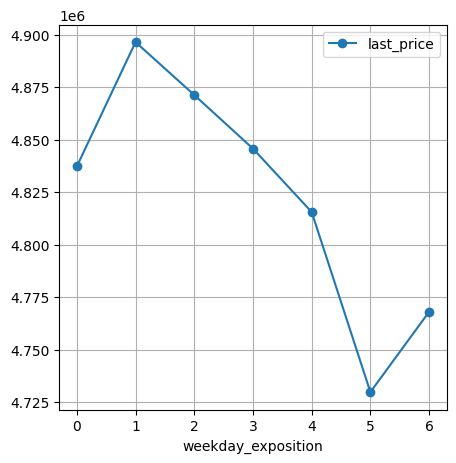

In [75]:
data.pivot_table(index='weekday_exposition', values='last_price')\
    .plot(grid=True, style='o-', figsize=(5, 5))


data_table_weekday = data.pivot_table(index='weekday_exposition', values='last_price', aggfunc=['mean','count','median']) 
data_table_weekday.columns = ['mean', 'count', 'median']

data_table_weekday.sort_values('median', ascending = False)



Квартиры выставляемые на продажу в выходные имеют меньшую стоимость аналогичных вариантов выставляемых в будние дни, разница в пределах 100 000 р.

,mean,count,median
year_exposition,,,
2014,5.782435e+06,89,5500000.0
2015,5.238065e+06,994,4885000.0
2019,5.097448e+06,2603,4800000.0
2018,4.773183e+06,7883,4390000.0
2016,4.792287e+06,2483,4300000.0
2017,4.764757e+06,7466,4299000.0


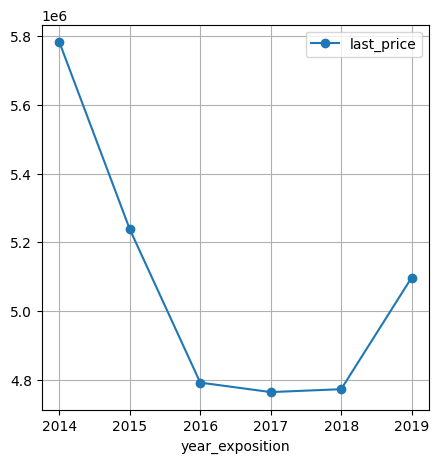

In [76]:
data.pivot_table(index='year_exposition', values='last_price')\
    .plot(grid=True, style='o-', figsize=(5, 5))



data_table_year = data.pivot_table(index='year_exposition', values='last_price', aggfunc=['mean','count','median']) 
data_table_year.columns = ['mean', 'count', 'median']

data_table_year.sort_values('median', ascending = False)







Пик цен на недвижимость был в 2014 году, далее идет спад с критическим значением в 2017 году.Затем рынок начинает оживать после кризиса, адаптироваться и цены пошли в рост, особенно рост заметен в период с 2018- 2019 год, но 600 000р с медианной цены 2014 года рынок еще не отыграл. Есть куда стремиться.

**Сравнение средней стоимости квадратного метра в топ-10 городов**

Сравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений.

In [77]:
ten_city = data['locality_name'].value_counts().head(10)
price_ten_city = data.query('locality_name in (@ten_city.index)').pivot_table(values='price_square_meter', index='locality_name')
price_ten_city = price_ten_city.astype(int)
price_ten_city.sort_values('price_square_meter', ascending=False)

,price_square_meter
locality_name,
Санкт-Петербург,105433
Пушкин,100289
Кудрово,95085
поселок Парголово,90176
поселок Мурино,85629
поселок Шушары,78551
Колпино,75184
Гатчина,68421
Всеволожск,67213


Наибольшая средняя стоимость квадратного метра в Санкт-Петербурге. Затем идёт Пушкин, затем идут районы,  являющиеся окраинами Санкт-Петербургом которые непосредственно с ним сливаются. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, а также неболшой по численности населения Выборг, расположенный на удаленном расстоянии от Санкт-Петербурга.

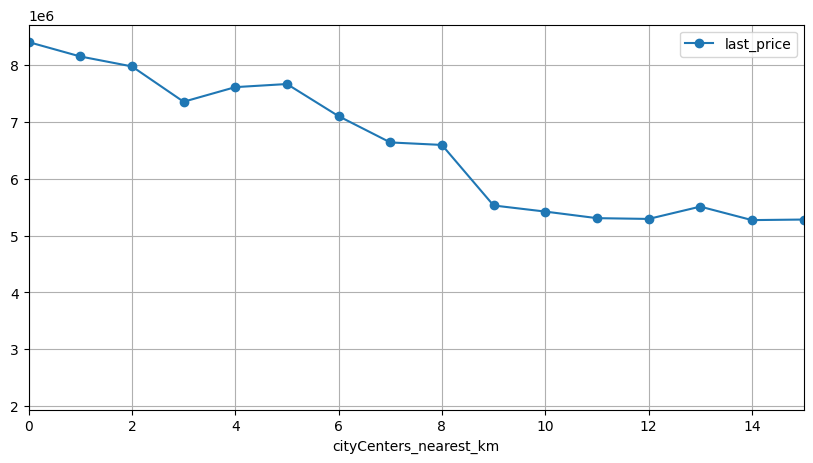

In [78]:
data.query('locality_name == "Санкт-Петербург"')\
    .pivot_table(index='cityCenters_nearest_km', values='last_price')\
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))

plt.show()

Центральная зона - это 7 км и меньше. Дальше 8 км средняя цена на квартиры резко снижается

In [79]:

pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <=20').\
pivot_table(index = 'cityCenters_nearest_km', values = 'price_square_meter', aggfunc = 'mean')
pivot_table_km                          
                  

,price_square_meter
cityCenters_nearest_km,
0.0,119157.500000
1.0,119577.495050
2.0,113551.425414
3.0,109018.457490
4.0,113851.870690
5.0,119631.510101
6.0,121838.286064
7.0,116454.139860
8.0,115568.568670


<AxesSubplot: xlabel='cityCenters_nearest_km'>

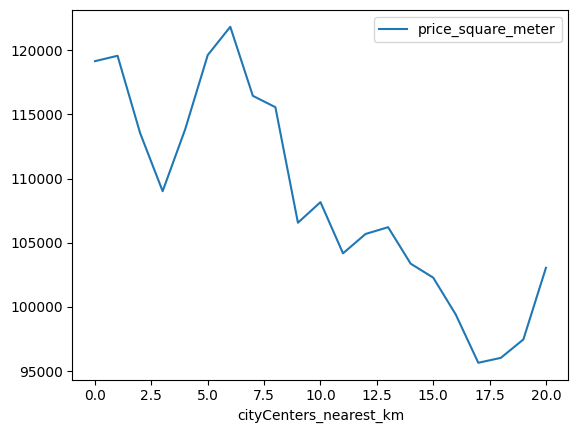

In [80]:
pivot_table_km.plot()

Cудя по графику цена квадратного метра начинает свой рост с 8-0 км к центру города. На графике виден обвал цены за кв.м в районе третьего км от центра. Если сравнить с предыдущим графмком, то видна аналогичная закономерность,общая стоимость last_price тоже имеет снижени в районе 3-го км от центра, но там провал не такой значительный. Скорее всего в этом районе находится старый жилой фонд имеющий большые площади квартир и потому цена за квадрат резко снежается, а полная стоимость остается высокой соответствующей центру города, хотя и имеет незначительное  снижение относительно других вариантов в пределах 8 км от центра.

**Вывод 4.**

 **Изучили параметры объектов, определили границы каждого показателя согласно показаниям гистограмм .**

  - total_area - 20-120 кв.м;
  - kitchen_area - 1 - 19 кв.м;
  - last_price -126000 - 12 000 000 руб
  - rooms - 0 - 6 комнат
  - ceiling_height - 2.6-2.8 м.
  - floor -1 - 17 этаж
  - floors_total - 1- 29 этажей
  - сityCenters_nearest_km - 0 - 26 км.
  - living_area - 3-75 кв.м
  - Расстояние до парка- 0 - 1200м.
  - Расстояние до аэропорта - 1900 - 62000м.
  - days_exposition -0-425 дней. Медиана - 95 дней
  - В категориях этажей лидируют "другие", что логично ,их больше чем первых и последних.На втором месте "последний "- около 3000 вариантов и замыкает тройку "первый"- чуть более 2500 вариантов.
  - В будние дни активность больше чем в выходные.
  - По месяцам лидер по размещению объявлений - февраль, далее - март, ноябрь. В мае самый низкий показатель, а также в декабре-январе наблюдается спад активности продавцов.
  
**Удалили выбивающеся значения применив функцию.**
    
**Проанализировали какие факторы больше всего влияют на общую стоимость объекта. Изучили как зависит ли цена от:**

**общей площади** - чем больше площадь тем выше цена. Коофициент корреляции Пирсона - 0.70

**жилой площади** - с жилой площадью также как и с общей , чем болеше тем дороже. Устойчивая взаимосвязь касательно объектов до 75 кв.м. Коофициент корреляции - 0.55

**площади кухни** - корреляция 0,45. Все таки общая и жилая площади чуть большее влияние имеют на стоимость.

**количества комнат**- с ростом количества комнат растет и цена.

**этажа** - в среднем квартиры на 1-м этаже  дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

**даты размещения** - Квартиры выставленные в июне дешевле чем выставленные в другие месяцы, спрос летом падает, т.к. многие в это время отдыхают, на рынке затишье и  поэтому продавцы снижают цены. Также для всех квартир справедливо утверждение, что они продаются дешевле по объявлению, сделанному в январе, марте, октябре. Пики цен приходятся на  апрель,декабрь,ноябрь.Квартиры выставляемые на продажу в выходные имеют меньшую стоимость аналогичных вариантов выставляемых в будние дни. Пик цен на недвижимость был в 2014 году, далее идет спад с критическим значением в 2017 году.Затем рынок начинает оживать после кризиса, адаптироваться и цены пошли в рост, особенно рост заметен в период с 2018- 2019 год.

**Сравнили среднюю стоимость квадратного метра в топ-10 городов по числу объявлений.**

Наибольшая средняя стоимость квадратного метра в Санкт-Петербурге- 105 т.р.. Затем идёт Пушкин- 100 т.р., потом идут районы, являющиеся окраинами Санкт-Петербургом которые непосредственно с ним сливаются, с ценой от 75-95 т.р . Из топ-10 наименьшая стоимость в Гатчине и Всеволожске - 68 т.р за кв.м., а также неболшой по численности населения Выборг с 59 т.р. за кв.м., расположенный на удаленном расстоянии от Санкт-Петербурга.

**Рассчитали среднюю цену для каждого километра в городе Санкт_Петербурге.**

Цена квадратного метра начинает свой рост с 8-0 км к центру города и достигает пика в 119т.р за кв.м. Выявлена закономерность, цена за кв.м. и общая стоимость имеют спад в районе 3-го км.Скорее всего в этом районе находится старый жилой фонд имеющий большые площади квартир и потому цена за квадрат резко снежается, а полная стоимость остается высокой соответствующей центру города, хотя и имеет незначительное снижение относительно других вариантов в пределах 8 км от центра. Нижняя граница цен в центре города 109т.р.за кв.м. И далее от 8 - 20 км варьируется от 105 до 95 т.р. за кв.м.


###  Общий вывод.


Мы обработали полученные данные, запонили прпущенные значения, где это было возможно и рационально, удалили выбивающиеся значения. Посчитали и добавили новые стлбцы со следующими параметрами: цена кв.м.,день недели, месяц, год публикации, тип этажа. Провели исследование данных и сделали следующие выводы:
-  С ростом количества комнат в квартире растёт и цена на неё.
-  1ый этаж самый дешевый, дешевле последнего на 5% и любого другог на 17%.
-  Квартира дороже в центре СПб, чем в остальном СПб и области.
-  В среднем, квартиры, по которым объявления о продаже появились на рынке в будний день, продаются по незначительно более высокой цене (на 2.3%), чем "выходные" квартиры.
-  Квартиры выставленные в июне дешевле чем выставленные в другие месяцы, спрос летом падает, т.к. многие в это время отдыхают, на рынке затишье и  поэтому продавцы снижают цены. Также для всех квартир справедливо утверждение, что они продаются дешевле по объявлению, сделанному в январе,  октябре. Пики цен приходятся на  апрель,март,сентябрь. Разница между июнем (min)и мартом (max)-6.8%
-  Мы можем сказать, что сильнее всего цена на квартиру зависит от цены за квадратный метр, от общей площади квартиры (чем больше площадь, тем выше цена), от площади жилой площади и площади кухни, а также от количества комнат.  Также влияние оказывает удаленность от центра - чем дальше от центра, тем ниже цена.
- Квартиры, размещенные к продаже в 2014 году, имеют самую высокую цену. Период 2015-2018 - период низких цен на квартиры (кризис). 2019г. - цены пошли вверх впервые после наступления кризиса но птери в цене в размере 17.3% еще рынком не отыграны.
- Среднее время продажи - 112 дней, около 4 месяцев. Медианное - 95 дней. 3 месяца для продажи квартиры - очень неплохой срок.

